In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('Final_dataset.csv')
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi,Delay
0,Nigeria,EXW,Air,2008-05-02,2008-02-05,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306,-87
1,Haiti,EXW,Air,2008-02-18,2008-02-18,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831,0
2,Guyana,EXW,Air,2008-09-04,2008-04-01,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831,-156
3,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328,0
4,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6997,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6998,Rwanda,N/A - From RDC,Air,2012-08-06,2012-06-01,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714,-66
6999,Uganda,N/A - From RDC,Truck,2012-06-12,2012-11-20,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714,161


In [14]:
data.columns

Index(['Country', 'Vendor INCO Term', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date', 'Vendor',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'First Line Designation', 'LineItemInsurance', 'Manufacturing country',
       'Manufacturing_Country_Lat', 'Manufacturing_Country_Lon',
       'Warehouse_Country_Lat', 'Warehouse_Country_Lon',
       'Distance_to_Warehouse_mi', 'Delay'],
      dtype='object')

In [15]:
def rename_shipment_mode(mode):
    if mode in ['Air', 'Air Charter']:
        return 'Air_All'
    elif mode in ['Truck', 'Ocean']:
        return 'Ground_Sea'
    else:
        return mode 
data['Shipment Mode'] = data['Shipment Mode'].apply(rename_shipment_mode)

print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price First Line Designation  \
0             6.50        0.01        0.00           

In [16]:
bin_edges_quantity = [0, 100, 500, 1000, 5000, 620000]  
bin_edges_value = [0, 50, 200, 500, 1000, 5952000]    
bin_edges_pack_price = [0, 1, 10, 50, 100, 710]        
bin_edges_unit_price = [0, 1, 10, 20, 38]             
bin_edges_distance = [0, 1000, 3000, 5000, 7000, 9500]
bin_edges_delay = [-500, -200, -100, 0, 300, 400] 

bin_labels_quantity = [0, 1, 2, 3, 4]
bin_labels_value = [0, 1, 2, 3, 4]
bin_labels_pack_price = [0, 1, 2, 3, 4]
bin_labels_unit_price = [0, 1, 2, 3]  
bin_labels_distance = [0, 1, 2, 3, 4]
bin_labels_delay = [0, 1, 2, 3, 4]


data['Line Item Quantity Bins'] = pd.cut(data['Line Item Quantity'], bins=bin_edges_quantity, labels=bin_labels_quantity)
data['Line Item Value Bins'] = pd.cut(data['Line Item Value'], bins=bin_edges_value, labels=bin_labels_value)
data['Pack Price Bins'] = pd.cut(data['Pack Price'], bins=bin_edges_pack_price, labels=bin_labels_pack_price)
data['Unit Price Bins'] = pd.cut(data['Unit Price'], bins=bin_edges_unit_price, labels=bin_labels_unit_price)
data['Distance to Warehouse Bins'] = pd.cut(data['Distance_to_Warehouse_mi'], bins=bin_edges_distance, labels=bin_labels_distance)
data['Delay Bins'] = pd.cut(data['Delay'], bins=bin_edges_delay, labels=bin_labels_delay)

print(data[['Line Item Quantity', 'Line Item Quantity Bins', 'Line Item Value', 'Line Item Value Bins', 'Pack Price', 'Pack Price Bins', 'Unit Price', 'Unit Price Bins', 'Distance_to_Warehouse_mi', 'Distance to Warehouse Bins','Delay Bins','Delay']].head())


   Line Item Quantity Line Item Quantity Bins  Line Item Value  \
0                 650                       2             6.50   
1                   2                       0           278.00   
2                 240                       1             2.40   
3                   6                       0           405.06   
4                 600                       2           870.00   

  Line Item Value Bins  Pack Price Pack Price Bins  Unit Price  \
0                    0        0.01               0        0.00   
1                    2      139.00               4        1.39   
2                    0        0.01               0        0.00   
3                    2       67.51               3        0.25   
4                    3        1.45               1        0.01   

  Unit Price Bins  Distance_to_Warehouse_mi Distance to Warehouse Bins  \
0             NaN                      6306                          3   
1               1                      6831               

In [17]:
data_binned = data[['Line Item Quantity Bins', 'Line Item Value Bins', 'Pack Price Bins', 'Unit Price Bins', 'Distance to Warehouse Bins', 'Delay Bins']]

print(data_binned.head())

  Line Item Quantity Bins Line Item Value Bins Pack Price Bins  \
0                       2                    0               0   
1                       0                    2               4   
2                       1                    0               0   
3                       0                    2               3   
4                       2                    3               1   

  Unit Price Bins Distance to Warehouse Bins Delay Bins  
0             NaN                          3          2  
1               1                          3          2  
2             NaN                          3          1  
3               0                          3          2  
4               0                          3          2  


In [18]:
X = data_binned

print(X.head())

  Line Item Quantity Bins Line Item Value Bins Pack Price Bins  \
0                       2                    0               0   
1                       0                    2               4   
2                       1                    0               0   
3                       0                    2               3   
4                       2                    3               1   

  Unit Price Bins Distance to Warehouse Bins Delay Bins  
0             NaN                          3          2  
1               1                          3          2  
2             NaN                          3          1  
3               0                          3          2  
4               0                          3          2  


In [19]:
X.dropna(inplace=True)
print(X.isnull().sum())

Line Item Quantity Bins       0
Line Item Value Bins          0
Pack Price Bins               0
Unit Price Bins               0
Distance to Warehouse Bins    0
Delay Bins                    0
dtype: int64


/var/folders/q1/3n6wbn716vvckd_78hpynvkc0000gn/T/ipykernel_28289/1323492279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [20]:
print(X.head())

  Line Item Quantity Bins Line Item Value Bins Pack Price Bins  \
1                       0                    2               4   
3                       0                    2               3   
4                       2                    3               1   
6                       0                    3               2   
7                       0                    1               1   

  Unit Price Bins Distance to Warehouse Bins Delay Bins  
1               1                          3          2  
3               0                          3          2  
4               0                          3          2  
6               1                          1          1  
7               0                          3          2  


In [21]:
X = data_binned
y = data.loc[data_binned.index, 'Shipment Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Multinomial Naive Bayes model ", accuracy)

Accuracy Multinomial Naive Bayes model  0.6527075812274368


In [23]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())

Training set shape: (5539, 6) (5539,)
Testing set shape: (1385, 6) (1385,)

Sample of training data:


,Line Item Quantity Bins,Line Item Value Bins,Pack Price Bins,Unit Price Bins,Distance to Warehouse Bins,Delay Bins
1520,3,4,1,0,2,2
5221,4,4,1,0,2,2
2290,3,4,1,0,3,3
2527,3,4,2,0,2,2
29,3,4,1,0,3,2



Sample of testing data:


,Line Item Quantity Bins,Line Item Value Bins,Pack Price Bins,Unit Price Bins,Distance to Warehouse Bins,Delay Bins
496,0,2,1,0,3,3
3883,4,4,2,1,3,1
3280,3,4,2,0,2,2
1345,4,4,1,0,3,2
1924,2,4,1,0,2,3


In [24]:
print("\nSample of training labels (y_train):")
display(y_train.head())

print("\nSample of testing labels (y_test):")
display(y_test.head())


Sample of training labels (y_train):


1520    Ground_Sea
5221    Ground_Sea
2290       Air_All
2527    Ground_Sea
29      Ground_Sea
Name: Shipment Mode, dtype: object


Sample of testing labels (y_test):


496     Ground_Sea
3883       Air_All
3280    Ground_Sea
1345       Air_All
1924       Air_All
Name: Shipment Mode, dtype: object

In [25]:
train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices & test_indices  # This should be an empty set
print("Overlap between training and testing set indices:", overlap)

Overlap between training and testing set indices: set()


Confusion Matrix:
 [[904   0]
 [481   0]]
Classification Report:
              precision    recall  f1-score   support

     Air_All       0.65      1.00      0.79       904
  Ground_Sea       0.00      0.00      0.00       481

    accuracy                           0.65      1385
   macro avg       0.33      0.50      0.39      1385
weighted avg       0.43      0.65      0.52      1385



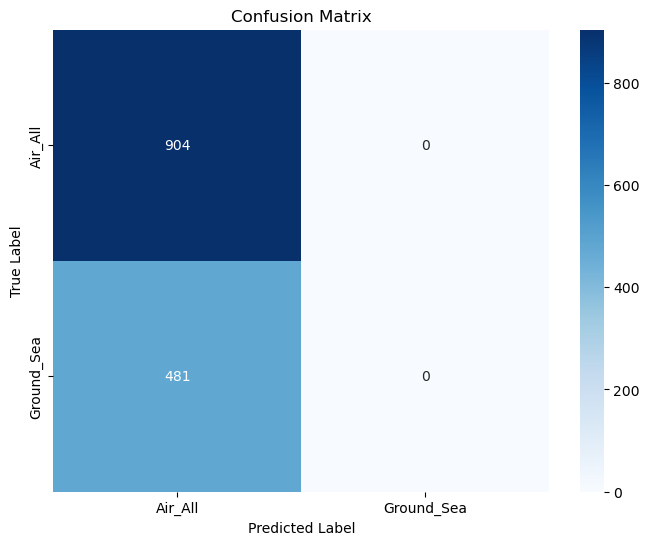

In [33]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


cm = confusion_matrix(y_test, y_pred)
class_labels = ['Air_All', 'Ground_Sea']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [27]:
combined_data = pd.concat([X, y], axis=1)
combined_data.to_csv('multinaivebayes.csv', index=False)

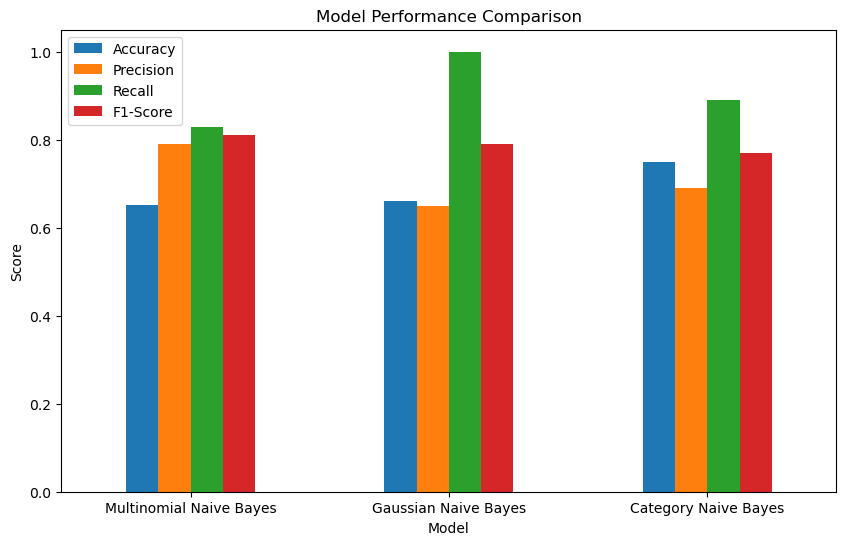

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already defined the models and obtained their predictions:
# y_test_1, y_pred_1 for Multinomial Naive Bayes
# y_test_2, y_pred_2 for Gaussian Naive Bayes
# y_test_3, y_pred_3 for Category Naive Bayes

# Define the accuracy for each model
accuracy_mnb = 0.6527075812274368
accuracy_gnb = 0.6597222222222222
accuracy_cnb = 0.7494646680942184

# Define classification reports as dictionaries (you can replace these with actual reports)
report_mnb = {
    'Air_All': {'precision': 0.79, 'recall': 0.83, 'f1-score': 0.81},
    'Ground_Sea': {'precision': 0.67, 'recall': 0.61, 'f1-score': 0.64},
    'accuracy': 0.75,
    'macro avg': {'precision': 0.73, 'recall': 0.72, 'f1-score': 0.72},
    'weighted avg': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75},
}

report_gnb = {
    'Air_All': {'precision': 0.65, 'recall': 1.00, 'f1-score': 0.79},
    'Ground_Sea': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00},
    'accuracy': 0.65,
    'macro avg': {'precision': 0.33, 'recall': 0.50, 'f1-score': 0.39},
    'weighted avg': {'precision': 0.43, 'recall': 0.65, 'f1-score': 0.52},
}

report_cnb = {
    'Air_All': {'precision': 0.69, 'recall': 0.89, 'f1-score': 0.77},
    'Ground_Sea': {'precision': 0.51, 'recall': 0.22, 'f1-score': 0.31},
    'accuracy': 0.66,
    'macro avg': {'precision': 0.60, 'recall': 0.56, 'f1-score': 0.54},
    'weighted avg': {'precision': 0.63, 'recall': 0.66, 'f1-score': 0.62},
}

# Create a DataFrame for easy comparison
models = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Category Naive Bayes']
accuracy = [accuracy_mnb, accuracy_gnb, accuracy_cnb]
precision = [report_mnb['Air_All']['precision'], report_gnb['Air_All']['precision'], report_cnb['Air_All']['precision']]
recall = [report_mnb['Air_All']['recall'], report_gnb['Air_All']['recall'], report_cnb['Air_All']['recall']]
f1_score = [report_mnb['Air_All']['f1-score'], report_gnb['Air_All']['f1-score'], report_cnb['Air_All']['f1-score']]

# Combine all the performance metrics into a DataFrame
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
})

# Plot the comparison of models
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()
